# 🛡️ Phishing Website Detection  
### Course: Data Science Methods in Cybersecurity

This project applies data science techniques to the problem of phishing website detection, as part of the course "Data Science Methods in Cybersecurity".

The workflow includes:

- Loading and exploring a cybersecurity-related dataset
- Performing detailed exploratory data analysis (EDA)
- Segmenting data using clustering
- Building and comparing supervised machine learning models (Boosting vs. Bagging)
- Evaluating model performance with standard classification metrics

The goal is to identify effective methods for detecting phishing websites based on structured features, and to demonstrate a full data science pipeline in the context of cybersecurity.

**Student Name**: *Hiba Shahbari*  
**Student ID**: *212968762*


In [35]:
!pip install pandas
!pip install scikit-learn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\היבא\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\היבא\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\היבא\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
# in this cell, we load the dataset and examine its structure:
# - file name, type, size, creation time
# - number of rows and columns
# - column names
# - data types
# - check for missing values

import pandas as pd  # import pandas for data analysis
import os
import datetime

# define file path
file_path = "phishing.csv"

# show basic file info
print("file name:", os.path.basename(file_path))
print("file type:", os.path.splitext(file_path)[-1])
file_size_kb = os.path.getsize(file_path) / 1024
print(f"file size: {file_size_kb:.2f} KB")
creation_time = os.path.getctime(file_path)
print("created on:", datetime.datetime.fromtimestamp(creation_time))

# load the dataset
df = pd.read_csv(file_path)

# set pandas to show all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# show the shape of the dataset
print("\nshape of the dataset:", df.shape)

# show column names
print("column names:", df.columns.tolist())

# show data types and non-null counts
print("\ndataframe info:")
print(df.info())

# check if there are any missing values
print("\nmissing values per column:")
print(df.isnull().sum())


file name: phishing.csv
file type: .csv
file size: 835.26 KB
created on: 2025-07-14 23:50:29.831421

shape of the dataset: (11054, 32)
column names: ['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'class']

dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  

In [37]:
# check for columns with only one unique value
# such columns don't help the model and may be removed later

print("columns with only one unique value:")
for col in df.columns:
    if df[col].nunique() == 1:
        print(col)

# check if 'Index' should be dropped
print("\nexample values from 'Index' column:")
print(df['Index'].head())

# drop the 'Index' column since it's just a row number
df.drop(columns=['Index'], inplace=True)

# confirm it's removed
print("\ncolumns after dropping 'Index':")
print(df.columns.tolist())


columns with only one unique value:

example values from 'Index' column:
0    0
1    1
2    2
3    3
4    4
Name: Index, dtype: int64

columns after dropping 'Index':
['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'class']


# 📊 Exploratory Data Analysis (EDA)

As required by the project instructions (לעשות EDA כמה שיותר מפורט), this section presents a detailed exploratory data analysis of the phishing dataset.

The goal of EDA is to extract as much insight as possible from the data before modeling, including identifying patterns, distributions, and relationships between features and the target variable.

In this part, we explore:

- The distribution of the target variable (`class`)
- The distribution of selected important features (`HTTPS`, `AnchorURL`, `WebsiteTraffic`, etc.)
- Feature relationships using a correlation matrix
- Statistical comparisons between phishing and legitimate websites
- Outliers and value spreads using boxplots

We use a variety of visual tools such as:
- Countplots
- Histograms
- Boxplots
- Correlation heatmaps

This analysis helps us understand the structure and behavior of the data and prepares the ground for model building and evaluation.


C:\Users\היבא\AppData\Local\Temp\ipykernel_30272\1499398495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


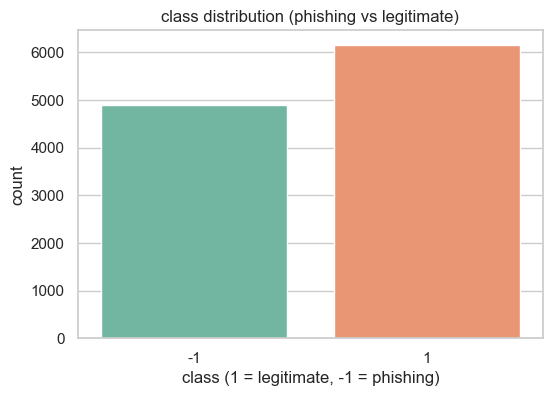

In [38]:
# plot the distribution of the target variable 'class'
# this helps visualize the balance between phishing and legitimate websites

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', palette='Set2')
plt.title("class distribution (phishing vs legitimate)")
plt.xlabel("class (1 = legitimate, -1 = phishing)")
plt.ylabel("count")
plt.show()

correlation with 'class':
class                  1.000000
HTTPS                  0.714704
AnchorURL              0.692895
PrefixSuffix-          0.348588
WebsiteTraffic         0.346003
SubDomains             0.298231
RequestURL             0.253478
LinksInScriptTags      0.248415
ServerFormHandler      0.221380
GoogleIndex            0.129000
AgeofDomain            0.121402
PageRank               0.104593
UsingIP                0.094033
StatsReport            0.079632
DNSRecording           0.075579
LongURL                0.057661
Symbol@                0.052994
StatusBarCust          0.041878
NonStdPort             0.036461
LinksPointingToPage    0.032694
InfoEmail              0.018039
DisableRightClick      0.012675
UsingPopupWindow       0.000136
Favicon               -0.000231
IframeRedirection     -0.003362
WebsiteForwarding     -0.020151
Redirecting//         -0.038885
HTTPSDomainURL        -0.040096
AbnormalURL           -0.060751
ShortURL              -0.067931
DomainRegLen  

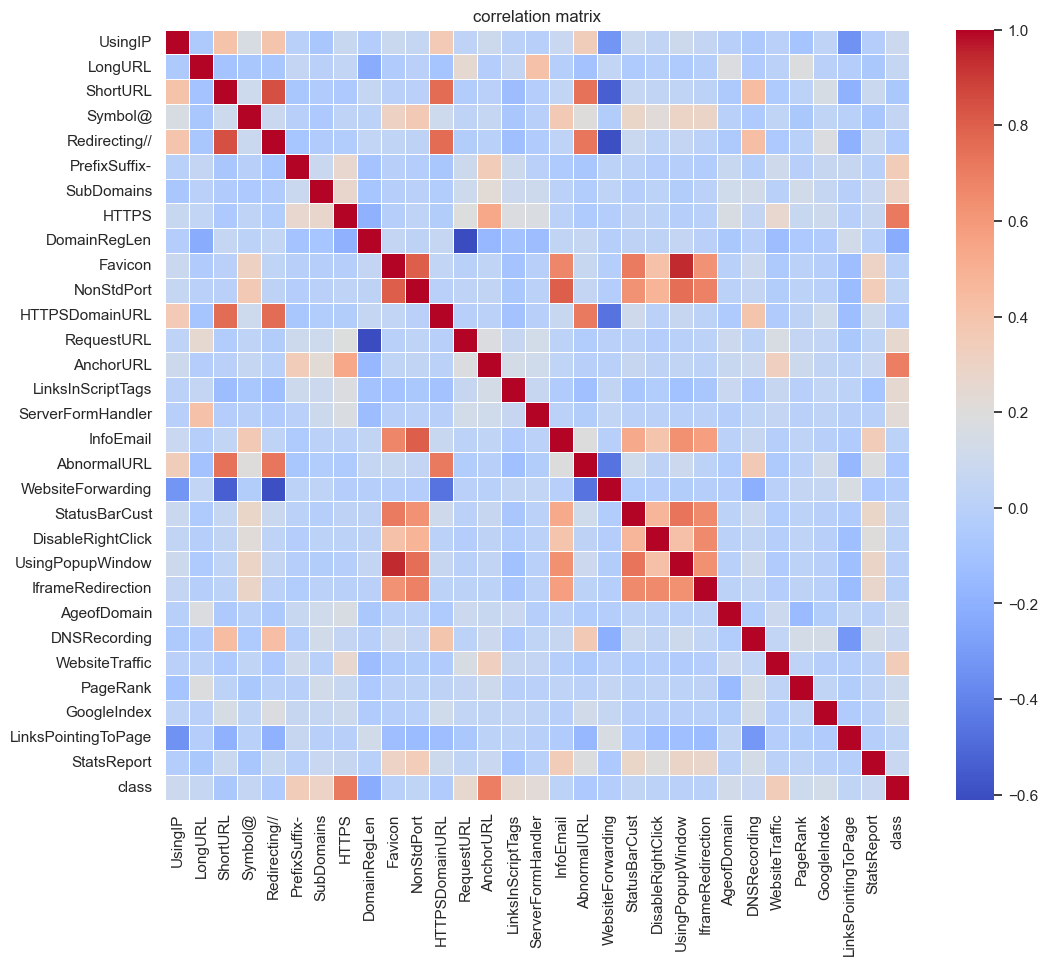

In [39]:
# in this cell, we calculate correlation between all features and the target 'class'
# this helps us understand which features are most important

import matplotlib.pyplot as plt
import seaborn as sns

# compute correlation matrix
corr_matrix = df.corr()

# show correlation with the target
print("correlation with 'class':")
print(corr_matrix['class'].sort_values(ascending=False))

# plot full correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("correlation matrix")
plt.show()


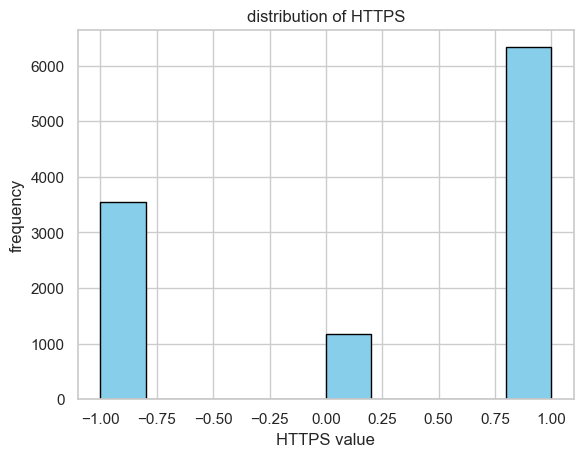

In [40]:
# plot histogram of the 'HTTPS' feature
# shows how often https is used and its relation to phishing

df['HTTPS'].hist(color='skyblue', edgecolor='black')
plt.title("distribution of HTTPS")
plt.xlabel("HTTPS value")
plt.ylabel("frequency")
plt.show()


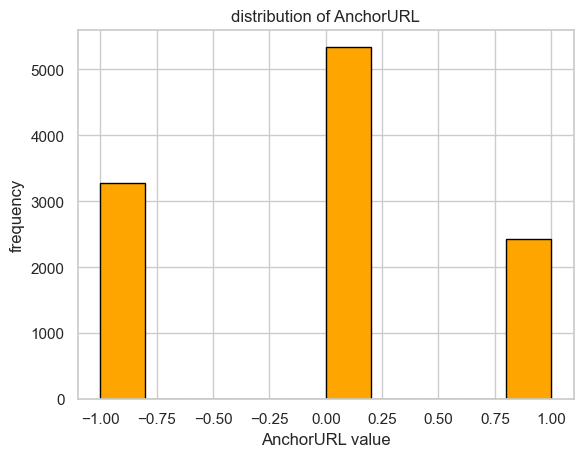

In [41]:
# plot histogram of the 'AnchorURL' feature
# shows how anchor links are distributed across the dataset

df['AnchorURL'].hist(color='orange', edgecolor='black')
plt.title("distribution of AnchorURL")
plt.xlabel("AnchorURL value")
plt.ylabel("frequency")
plt.show()


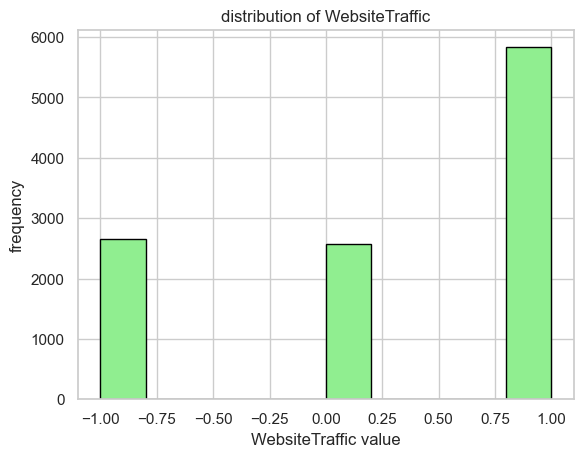

In [42]:
# plot histogram of the 'WebsiteTraffic' feature
# shows whether websites had traffic and if it's relevant to phishing

df['WebsiteTraffic'].hist(color='lightgreen', edgecolor='black')
plt.title("distribution of WebsiteTraffic")
plt.xlabel("WebsiteTraffic value")
plt.ylabel("frequency")
plt.show()

In [43]:
# compare average values of all features between class 0 and class 1
# helps identify which features differ most between phishing and legitimate sites

print("mean values of features by class:")
print(df.groupby('class').mean().T)

mean values of features by class:
class                      -1         1
UsingIP              0.213804  0.393536
LongURL             -0.682867 -0.593958
ShortURL             0.790076  0.697905
Symbol@              0.658158  0.734286
Redirecting//        0.770880  0.718369
PrefixSuffix-       -1.000000 -0.524119
SubDomains          -0.209312  0.281468
HTTPS               -0.479681  0.832223
DomainRegLen        -0.098223 -0.526393
Favicon              0.628752  0.628390
NonStdPort           0.700225  0.750528
HTTPSDomainURL       0.708393  0.648855
RequestURL          -0.092506  0.408803
AnchorURL           -0.632020  0.365438
LinksInScriptTags   -0.331019  0.050999
ServerFormHandler   -0.784154 -0.445834
InfoEmail            0.620176  0.648205
AbnormalURL          0.753727  0.667046
WebsiteForwarding    0.122932  0.109956
StatusBarCust        0.731672  0.786260
DisableRightClick    0.908107  0.918467
UsingPopupWindow     0.613233  0.613448
IframeRedirection    0.819073  0.815170
AgeofD

# 🔄 Segmentation & Clustering Analysis

As part of the exploratory process, we performed unsupervised segmentation using KMeans clustering.  
The goal was to group websites into clusters based on feature similarity and compare the clusters to the known `class` labels.

This helps evaluate whether natural groupings in the data match the phishing vs. legitimate classification.

We used:
- StandardScaler to normalize feature values
- KMeans with 2 clusters (expected: phishing vs. legitimate)
- Cross-tabulation to compare clustering with actual labels


In [44]:
# apply kmeans clustering on the features to identify natural segments

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# drop target column for clustering
X_cluster = df.drop(columns=['class'])

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# fit kmeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# add cluster result back to dataframe
df['cluster'] = clusters

# compare cluster assignments to actual class
print("comparison between kmeans clusters and actual class:")
print(pd.crosstab(df['cluster'], df['class']))


comparison between kmeans clusters and actual class:
class      -1     1
cluster            
0         495   822
1        4402  5335


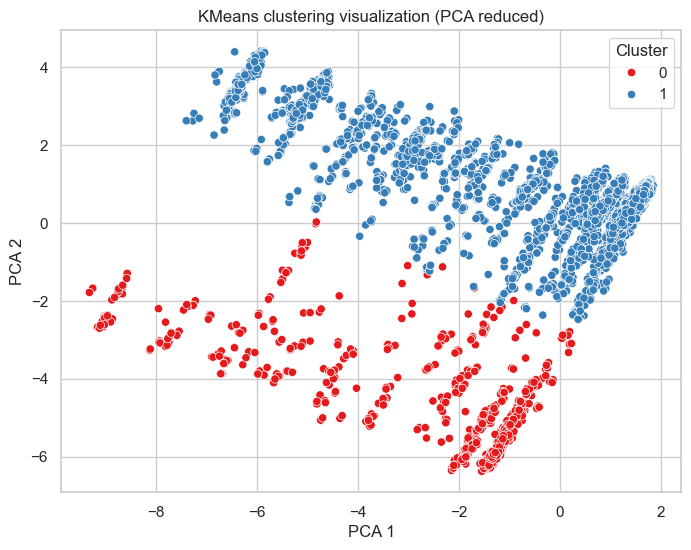

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set1')
plt.title("KMeans clustering visualization (PCA reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


# Model Building: Boosting vs. Bagging

In this section, we build and compare two supervised machine learning models to classify phishing websites:

- **XGBoost**: A powerful Boosting algorithm that learns sequentially and focuses on correcting previous mistakes.
- **Random Forest**: A Bagging-based algorithm that trains multiple decision trees in parallel and aggregates their results.

---

### 📏 Evaluation Metrics

To evaluate how well each model approximates the true class labels (prediction quality),  
we use standard classification metrics:

- **Accuracy** – overall correctness of predictions  
- **Precision** – how many predicted phishing websites were actually phishing  
- **Recall** – how many real phishing websites were correctly identified  
- **F1-score** – balance between precision and recall  
- **Confusion matrix** – shows true vs. predicted classes, helping us identify false positives and false negatives

These metrics help assess each model's predictive performance and determine which approach is more effective for phishing detection.

In [46]:
# train a boosting model using xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# split data
X = df.drop(columns=['class', 'cluster'])  # remove target + cluster
y = df['class'].replace(-1, 0)  # convert class labels to 0/1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train xgboost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# predictions
xgb_pred = xgb_model.predict(X_test)

# evaluation
print("xgboost accuracy:", accuracy_score(y_test, xgb_pred))
print("\nclassification report:")
print(classification_report(y_test, xgb_pred))
print("\nconfusion matrix:")
print(confusion_matrix(y_test, xgb_pred))


C:\Users\היבא\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:47:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


xgboost accuracy: 0.9706015377657169

classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211


confusion matrix:
[[ 932   44]
 [  21 1214]]


In [47]:
# train a bagging model using random forest

from sklearn.ensemble import RandomForestClassifier

# train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# predictions
rf_pred = rf_model.predict(X_test)

# evaluation
print("random forest accuracy:", accuracy_score(y_test, rf_pred))
print("\nclassification report:")
print(classification_report(y_test, rf_pred))
print("\nconfusion matrix:")
print(confusion_matrix(y_test, rf_pred))


random forest accuracy: 0.9692446856625961

classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211


confusion matrix:
[[ 937   39]
 [  29 1206]]


### Model Comparison Summary: XGBoost vs. Random Forest

We compared two supervised learning models for phishing detection:

####  XGBoost (Boosting)
- **Accuracy**: 97.06%
- **Precision** (phishing): 0.97
- **Recall** (phishing): **0.98**
- **False negatives**: 21
- **False positives**: 44

####  Random Forest (Bagging)
- **Accuracy**: 96.92%
- **Precision** (phishing): 0.97
- **Recall** (phishing): 0.98
- **False negatives**: **29**
- **False positives**: **39**

#### 📌 Conclusion:
Both models achieved excellent performance with nearly identical F1-scores.  
XGBoost performed slightly better in detecting phishing attempts (fewer false negatives),  
while Random Forest produced fewer false positives.  

**Overall**, XGBoost offers a small advantage in critical security contexts where missing phishing threats is more dangerous than flagging legitimate sites.


# Final Project Summary

In this project, we explored a phishing detection dataset using a full data science pipeline,  
as if preparing for a real-world technical interview or a production system.

We followed these steps:

1. **Dataset Exploration and Cleaning**  
   - Loaded and examined file structure, size, and columns  
   - Checked data types and missing values  
   - Removed unhelpful features like the index column  

2. **Detailed Exploratory Data Analysis (EDA)**  
   - Explored class distribution and feature patterns  
   - Visualized data with histograms, boxplots, and a correlation heatmap  
   - Identified features most correlated with phishing behavior  

3. **Segmentation and Clustering**  
   - Applied KMeans to find natural groupings in the data  
   - Compared clustering results to the known class labels  

4. **Model Building and Evaluation**  
   - Built two models: XGBoost (Boosting) and Random Forest (Bagging)  
   - Evaluated both using accuracy, precision, recall, F1-score, and confusion matrix  
   - Found that XGBoost slightly outperformed Random Forest in recall  

5. **Recommendations and Insights**  
   - XGBoost is more suitable in security-focused scenarios  
   - Some features could be further reduced or engineered  
   - Future work may include NLP or time-based phishing trends if such features are available

---

Overall, this project demonstrates the ability to analyze a cybersecurity-related dataset, extract meaningful insights, and build effective models — following a structured and professional pipeline.
